In [1]:
# Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import sklearn 
from datetime import datetime

# Tratamento dos dados

In [30]:
# lendo o arquivo csv
df = pd.read_csv('desafio_BI.csv',sep='|',encoding='latin1')

In [31]:
df.head()


,Data,Marca,Fabricante,ReferÃªncia_Elofar,UF,Unidades,R$,Tipo_canal
0,2018-01-01,ALIVBABY,CAZI,BENZEVIT,BA,"31,0","171,886",FARMACIAS
1,2018-01-01,ALIVBABY,CAZI,BENZEVIT,CE,"529,0","3160,751",FARMACIAS
2,2018-01-01,ALIVBABY,CAZI,BENZEVIT,DF,"7,0","38,813",FARMACIAS
3,2018-01-01,ALIVBABY,CAZI,BENZEVIT,GO,"15,0","83,17",FARMACIAS
4,2018-01-01,ALIVBABY,CAZI,BENZEVIT,MA,"295,0","1635,689",FARMACIAS


In [32]:
#Renomeando a coluna R$ e referencias_elofar 
df.rename(columns={'R$': 'Valor_vendas'}, inplace = True)
df.rename(columns={'ReferÃªncia_Elofar': 'Ref_Elofar'}, inplace = True)

In [33]:
# tamanho do dataset
df.shape

(253270, 8)

In [34]:
# Informaçoes sobre nulos e tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253270 entries, 0 to 253269
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Data          253270 non-null  object
 1   Marca         253270 non-null  object
 2   Fabricante    253270 non-null  object
 3   Ref_Elofar    253270 non-null  object
 4   UF            253270 non-null  object
 5   Unidades      253270 non-null  object
 6   Valor_vendas  253270 non-null  object
 7   Tipo_canal    253270 non-null  object
dtypes: object(8)
memory usage: 15.5+ MB


In [35]:
# Alterando os tipos de dados
## Tranformando o tipo da coluna data
df['Data'] = df['Data'].astype(str)
df['Data'] = pd.to_datetime(df['Data'])


In [36]:
# Tranformando o tipo da coluna Unidades
## primeiro substituir "," por "." como separador decimal

df['Unidades'] = df['Unidades'].apply(lambda x: str(x).split(',')[0])
## tranformar coluna unidades em tipo float
df['Unidades'] = df['Unidades'].astype(int)

In [37]:
# Tranformando o tipo da coluna Valor_vendas
## primeiro substituir "," por "." como separador decimal
df['Valor_vendas'] = df['Valor_vendas'].apply(lambda x: str(x).replace (",", "."))

## tranformar coluna R$ em tipo float
df['Valor_vendas'] = df['Valor_vendas'].astype(float)

## Arredondar casas decimais de Valor_vendas
df['Valor_vendas'] = df['Valor_vendas'].round(2)

In [38]:
#Checando novamente os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253270 entries, 0 to 253269
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Data          253270 non-null  datetime64[ns]
 1   Marca         253270 non-null  object        
 2   Fabricante    253270 non-null  object        
 3   Ref_Elofar    253270 non-null  object        
 4   UF            253270 non-null  object        
 5   Unidades      253270 non-null  int32         
 6   Valor_vendas  253270 non-null  float64       
 7   Tipo_canal    253270 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 14.5+ MB


In [39]:
df.head()

,Data,Marca,Fabricante,Ref_Elofar,UF,Unidades,Valor_vendas,Tipo_canal
0,2018-01-01,ALIVBABY,CAZI,BENZEVIT,BA,31,171.89,FARMACIAS
1,2018-01-01,ALIVBABY,CAZI,BENZEVIT,CE,529,3160.75,FARMACIAS
2,2018-01-01,ALIVBABY,CAZI,BENZEVIT,DF,7,38.81,FARMACIAS
3,2018-01-01,ALIVBABY,CAZI,BENZEVIT,GO,15,83.17,FARMACIAS
4,2018-01-01,ALIVBABY,CAZI,BENZEVIT,MA,295,1635.69,FARMACIAS


## Estatistica descritiva

In [23]:
#!pip install sweetviz
import sweetviz as sv

In [40]:
#Estatistica descritiva dos dados numericos
df.describe()

,Unidades,Valor_vendas
count,253270.000000,2.532700e+05
mean,1924.020417,1.519710e+04
std,12063.782589,6.206093e+04
min,0.000000,1.000000e-02
25%,12.000000,1.428400e+02
50%,106.000000,1.108410e+03
75%,737.000000,7.644727e+03
max,814510.000000,3.948751e+06


In [41]:
# Gerando um relatorio com biblioteca sweetviz
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [42]:
#Separando variais dependentes e indepentes
X= df.iloc[:,[1,2,4,7]] #independente (valores categoricos que sao preditores ou explicativos para variaçoes nos resultados em questao de vendas(Marca, Fabricante, UF, Canal))
y =df.iloc[:,[5,6]] #dependente (medidas ou variaveis de resultados('Unidades' e 'Valor_vendas'))


In [43]:
print(X)

           Marca Fabricante  UF Tipo_canal
0       ALIVBABY       CAZI  BA  FARMACIAS
1       ALIVBABY       CAZI  CE  FARMACIAS
2       ALIVBABY       CAZI  DF  FARMACIAS
3       ALIVBABY       CAZI  GO  FARMACIAS
4       ALIVBABY       CAZI  MA  FARMACIAS
...          ...        ...  ..        ...
253265  VITPURUM  VITAMEDIC  RO  FARMACIAS
253266  VITPURUM  VITAMEDIC  RS  FARMACIAS
253267  VITPURUM  VITAMEDIC  SC  FARMACIAS
253268  VITPURUM  VITAMEDIC  SP  FARMACIAS
253269  VITPURUM  VITAMEDIC  TO  FARMACIAS

[253270 rows x 4 columns]


In [44]:
print(y)

        Unidades  Valor_vendas
0             31        171.89
1            529       3160.75
2              7         38.81
3             15         83.17
4            295       1635.69
...          ...           ...
253265        58        393.82
253266        22        149.38
253267         1          6.79
253268       109        740.11
253269        15        101.85

[253270 rows x 2 columns]


In [45]:
# Média da coluna Unidades
media_unidades = y['Unidades'].mean()
print(f'Media Unidades: {media_unidades}')

# Média da coluna R$
media_vendas = y['Valor_vendas'].mean()
print(f'Media Valor_vendas: {media_vendas}')

Media Unidades: 1924.0204169463418
Media Valor_vendas: 15197.101384885862


In [46]:
#Mediana da coluna Unidades
mediana_unidades = y['Unidades'].median()
print(f'Mediana Unidades: {mediana_unidades}')

#Mediana da coluna Valor_vendas
mediana_valor_vendas = y['Valor_vendas'].median()
print(f'Mediana Valor_vendas: {mediana_valor_vendas}')

Mediana Unidades: 106.0
Mediana Valor_vendas: 1108.41


In [47]:
#Variancia da coluna Unidades ( medida de dispersao para medir o quao afastados os dados estao da media/ quanto maior a variancia mais afastados os dados se encontram da media)
variancia_unidades = y['Unidades'].var()
print(f'Variancia Unidades: {variancia_unidades}')

#Mediana da coluna Valor_vendas
variancia_valor_vendas = y['Valor_vendas'].var()
print(f'Variancia Valor_vendas: {variancia_valor_vendas}')

Variancia Unidades: 145534850.35457656
Variancia Valor_vendas: 3851559149.6006775


In [48]:
# Desvio Padrao da coluna Unidades (indica o quanto um conjunto de dados é uniforme. Quanto mais próximo de 0 for o desvio padrão, mais homogêneo são os dados)
desv_unidades = y['Unidades'].std()
print(f'Desvio Padrao de Unidades: {desv_unidades}')

#Desvio Padrao da coluna Valor_vendas
desv_valor_vendas = y['Valor_vendas'].std()
print(f'Desvio Padrao de Valor_vendas: {desv_valor_vendas}')

Desvio Padrao de Unidades: 12063.78258899656
Desvio Padrao de Valor_vendas: 62060.93094371593


### Trabalhando com dados categoricos

In [49]:
# Verificando a ocorrencia de dados nos valores categoricos do dataframe
df['Marca'].value_counts()

COMBIRON FOLICO         2383
NEUTROFER               2356
MASFEROL                2335
CIPROFLOXACINO P.D      2328
BACTRIM F               2316
                        ... 
TRAMINER                   1
QUIMIO                     1
CIPROFLOXACINO LAS         1
FLU+POLI+NEO+LID EMS       1
MAXTONICO                  1
Name: Marca, Length: 316, dtype: int64

In [50]:
df['Fabricante'].value_counts()

EMS          20045
FQM GRUPO    12227
EUROFARMA    12096
GLOBO        11520
GEOLAB       11392
             ...  
FARMION          2
BIOFARMA         2
LASA             1
STIEFEL          1
TKS              1
Name: Fabricante, Length: 104, dtype: int64

In [51]:
df['Ref_Elofar'].value_counts()

CIPROFAR     44287
VI-FERRIN    41818
NISUFAR      36615
BENZEVIT     27203
BACFAR       26314
MAGNACAL     21597
PETALLA      15064
SECFAR       14942
ELOTIN       14126
VALERANCE    11304
Name: Ref_Elofar, dtype: int64

In [52]:
df['UF'].value_counts()

SP    14428
MG    13021
PR    12804
RJ    12409
PE    11878
SC    11791
BA    11724
RS    11715
PA    11655
GO    11301
MA     9925
CE     9716
ES     8924
PB     8728
MT     8699
PI     8605
AM     7964
RN     7939
DF     7657
RO     7648
SE     7522
AL     7486
MS     7093
TO     6395
AC     5812
AP     5249
RR     5182
Name: UF, dtype: int64

In [53]:
df['Tipo_canal'].value_counts()

FARMACIAS     159712
OUTROS         56199
HOSPITALAR     37359
Name: Tipo_canal, dtype: int64

<AxesSubplot:xlabel='Unidades', ylabel='Valor_vendas'>

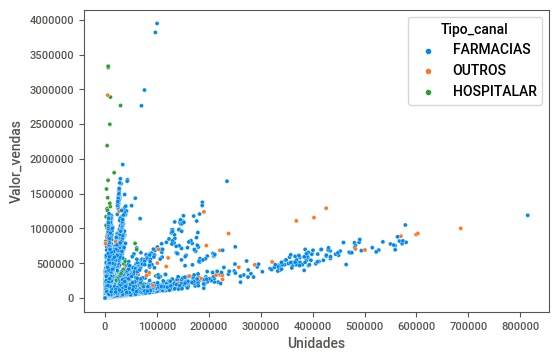

In [55]:
# Esse grafico mostra a variaçao em unidades e valor de vendas em relaçao aos diferentes tipos de canal 

sn.scatterplot(data=df, x="Unidades", y="Valor_vendas", hue= df['Tipo_canal'])

### Salvando o dataset tratado em um arquivo csv.

In [57]:
df.to_csv("f_elofar.csv")